In [1]:
import pandas as pd
data_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/KPMG_VI_New_raw_data_update_final.xlsx"

In [2]:
# There are multiple sheets in the excel file : 

# CustomerDemographic
CustomerDemographic = pd.read_excel(data_path, sheet_name= "CustomerDemographic", header=1)

# CustomerAddress
CustomerAddress = pd.read_excel(data_path, sheet_name= "CustomerAddress", header= 1)

# Transactions
Transactions = pd.read_excel(data_path, sheet_name= "Transactions", header= 1)

# NewCustomerList
NewCustomerList = pd.read_excel(data_path, sheet_name= "NewCustomerList", header= 1)

### Data Quality Framework Table

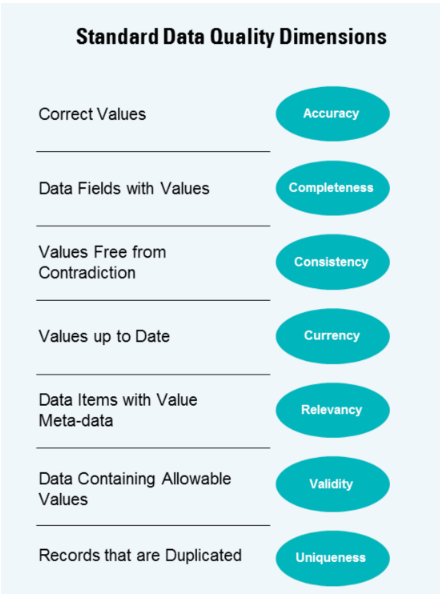

## CustomerDemographic

In [3]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

#### Primary Notes: 
1. `gender` column have inconsistencies
2. `job_title` have `NaN` values
3. `job_industry_category` have `NaN` values
4. `default` feature looks like mess 

In [5]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

### Gender 

In [6]:
CustomerDemographic['gender'].value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

In [7]:
gender_mapping = {'F': 'Female', 'Femal': 'Female', 'M': 'Male'}
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace(gender_mapping)


CustomerDemographic['gender'].value_counts()

gender
Female    2039
Male      1873
U           88
Name: count, dtype: int64

Recommendation: We can replace Unknown genders by using customer names 

### DOB 

In [8]:

CustomerDemographic["DOB"].dtype # it is object data type, needs to be converted to datetime

dtype('O')

In [9]:
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])
print(CustomerDemographic["DOB"].dtype)

datetime64[ns]


In [10]:
# There are 87 missing values:
# Calculate the mean date
mean_date = CustomerDemographic['DOB'].mean()
print(mean_date)
# Fill missing values with the mean date
CustomerDemographic['DOB'].fillna(mean_date, inplace=True)

1977-07-12 23:56:41.277792


In [11]:
CustomerDemographic.sort_values(by= "DOB",ascending= True).head(5) # dude that never died???

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0


In [12]:
2023-1843 # 180 years old guy?

180

### job_title 

There are 506 `NaN` values in this feature.

In [13]:
CustomerDemographic['job_title'].value_counts()

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

### job_industry_category

There are 656 `NaN` values in this feature.

In [14]:
CustomerDemographic['job_industry_category'].value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

### default 

In [15]:
CustomerDemographic['default'].value_counts()

default
100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: count, Length: 90, dtype: int64

In [16]:
# This feature looks unnecessary, should be removed
CustomerDemographic.drop(labels="default", axis=1, inplace=True)

In [17]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


### owns_car  

In [18]:
CustomerDemographic['owns_car'].value_counts()

owns_car
Yes    2024
No     1976
Name: count, dtype: int64

In [19]:
# for consistency:
owns_car_maping = {'Yes':'Y', 'No': 'N' }
CustomerDemographic['owns_car'] = CustomerDemographic['owns_car'].replace(owns_car_maping, regex= True)
CustomerDemographic['owns_car'].value_counts()

owns_car
Y    2024
N    1976
Name: count, dtype: int64

### tenure 

In [20]:
mean_tenure = CustomerDemographic['tenure'].mean()

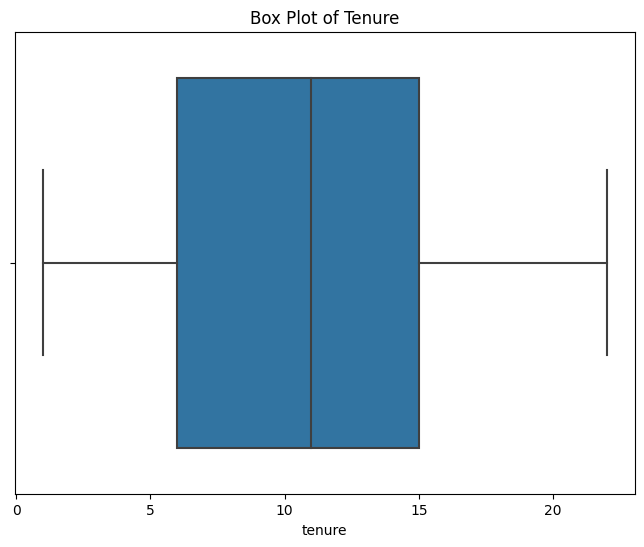

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize the distribution and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=CustomerDemographic['tenure'])
plt.title('Box Plot of Tenure')
plt.show()


There are no outliers so we can replace `nan` values with mean 

In [22]:
print(mean_tenure)
CustomerDemographic['tenure'] = CustomerDemographic['tenure'].fillna(mean_tenure)

10.65704063378482


### wealth_segment

In [23]:
CustomerDemographic['wealth_segment'].value_counts()

wealth_segment
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: count, dtype: int64

In [24]:
CustomerDemographic.isnull().sum() 

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

## CustomerAddress

In [25]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [26]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


Awesome !!! It is clean data. 

## NewCustomerList

In [27]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [28]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [29]:
# gender 
NewCustomerList['gender'].value_counts() # clean :)

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

In [30]:
# dob
NewCustomerList["DOB"] = pd.to_datetime(NewCustomerList["DOB"])
print(NewCustomerList["DOB"].dtype)

datetime64[ns]


In [31]:
# unnamed?
NewCustomerList.iloc[0:5,16:20]

,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0.56,0.7000,0.8750,0.743750
1,0.89,0.8900,1.1125,0.945625
2,1.01,1.0100,1.0100,1.010000
3,0.87,1.0875,1.0875,1.087500
4,0.52,0.5200,0.6500,0.650000


## Transactions 

In [32]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [33]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [34]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### online_order

In [35]:
Transactions['online_order'].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [36]:
# we can change values to boolean for online order 
Transactions['online_order'] = Transactions['online_order'].astype(bool)

In [37]:
Transactions['online_order'].value_counts()

online_order
True     10189
False     9811
Name: count, dtype: int64

### order_status 

In [38]:
Transactions['order_status'].value_counts()

order_status
Approved     19821
Cancelled      179
Name: count, dtype: int64

In [39]:
# Loop over features and print unique values
for feature in features:
    unique_values = Transactions[feature].unique()
    print(f"{feature}: {unique_values}")

NameError: name 'features' is not defined

Recommendations: We can replace `nan` with mode values for `product_class` and `product_size`.

In [ ]:
features = ['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']
filtered_rows = Transactions[pd.isna(Transactions[features]).all(axis=1)] # any (OR), all (AND) , ~ (NOT) 
filtered_rows


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,False,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,False,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,False,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,True,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,False,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,True,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,False,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,False,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,True,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [ ]:
filtered_rows['product_id'].unique()  # for these 197 product Id is 0 means there is no actual purchase

array([0])

Recommendation: We can drop these `197` rows because they have `nan` values for these 6 features.

Note: `customer_id` is common feature between all 4 sheets. 